In [1]:
import numpy as np
import pandas as pd
from scipy import stats,spatial,sparse
from sklearn import manifold,datasets
import time
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.gridspec as gridspec

C:\Users\Jon\AppData\Local\Temp\ipykernel_13400\3944669665.py:194: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  gs2.tight_layout(fig, rect=[0, 0, 1, 0.5])


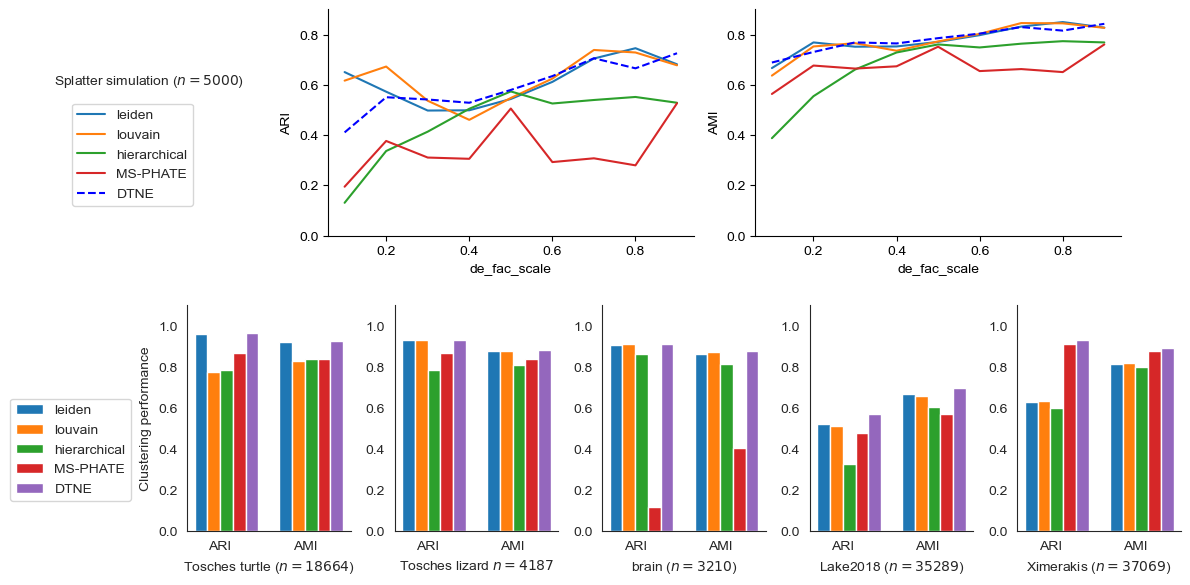

In [2]:
fig = plt.figure(figsize=(12, 6))

gs1 = gridspec.GridSpec(1, 2)
ax1 = fig.add_subplot(gs1[0])
ax2 = fig.add_subplot(gs1[1])

sns.set_style(style='white')

x = np.arange(0.1,1,0.1)

leiden_ari =  np.array([0.651, 0.573, 0.498, 0.499, 0.544, 0.612, 0.705, 0.746, 0.682])
leiden_ami =  np.array([0.667, 0.769, 0.752, 0.753, 0.771, 0.798, 0.832, 0.850, 0.828])
louvain_ari = np.array([0.617, 0.673, 0.537, 0.461, 0.548, 0.625, 0.739, 0.729, 0.678])
louvain_ami = np.array([0.637, 0.753, 0.766, 0.736, 0.773, 0.803, 0.846, 0.845, 0.827])

Agglo_ari   = np.array([0.131, 0.337, 0.414, 0.505, 0.574, 0.526, 0.540, 0.552, 0.529])
Agglo_ami   = np.array([0.388, 0.555, 0.661, 0.729, 0.761, 0.749, 0.764, 0.774, 0.769])

mp_ari      = np.array([0.195, 0.377, 0.311, 0.306, 0.506, 0.293, 0.308, 0.280, 0.527])
mp_ami      = np.array([0.564, 0.677, 0.665, 0.674, 0.752, 0.655, 0.663, 0.651, 0.761])

DTNE_ari    = np.array([0.411, 0.551, 0.542, 0.529, 0.580, 0.635, 0.706, 0.666, 0.726]) 
DTNE_ami    = np.array([0.689, 0.731, 0.769, 0.765, 0.786, 0.804, 0.830, 0.816, 0.843])


ax1.plot(x, leiden_ari,  label="leiden")
ax1.plot(x, louvain_ari, label="louvain")
ax1.plot(x, Agglo_ari,   label="hierarchical")
ax1.plot(x, mp_ari,   label="MS-PHATE")
ax1.plot(x, DTNE_ari,  "--b", label="DTNE")
# ax1.legend(loc=4)
ax1.set_ylim(0, 0.9)
ax1.set_xlabel('de_fac_scale')
ax1.set_ylabel('ARI')
sns.despine(top=True,right=True,left=False,bottom=False,)

ax2.plot(x, leiden_ami,  label="leiden")
ax2.plot(x, louvain_ami, label="louvain")
ax2.plot(x, Agglo_ami,   label="hierarchical")
ax2.plot(x, mp_ami,   label="MS-PHATE")
ax2.plot(x, DTNE_ami,  "--b", label="DTNE")
ax2.set_ylim(0, 0.9)
ax2.set_xlabel('de_fac_scale')
ax2.set_ylabel('AMI')

ax1.legend(loc=4, bbox_to_anchor=(-0.35, 0.1))
ax1.text(-0.6,0.6,"Splatter simulation ($n=5000$)")

gs1.tight_layout(fig, rect=[0, 0.5, 0.95, 1])

gs2 = gridspec.GridSpec(1, 5)
ax3 = fig.add_subplot(gs2[0])
ax4 = fig.add_subplot(gs2[1])
ax5 = fig.add_subplot(gs2[2])
ax6 = fig.add_subplot(gs2[3])
ax7 = fig.add_subplot(gs2[4])


correlation = ['ARI','AMI']
pseudotime_corr = {
    'leiden':(0.959, 0.918),
    'louvain':(0.773, 0.829),
    'hierarchical':(0.782, 0.836),
    'MS-PHATE':(0.864, 0.835),
    'DTNE':(0.963, 0.925)
    }
x = np.arange(len(correlation))  # the label locations
width = 0.15  # the width of the bars
multiplier = 0

# fig, ax = plt.subplots(layout='constrained')
for name, corr in pseudotime_corr.items():
    offset = width * multiplier
    rects = ax3.bar(x + offset, corr, width, label=name)
    # ax3.bar_label(rects, padding=1,fontsize=7)
    multiplier += 1

ax3.set_ylabel('Clustering performance')
ax3.set_xlabel('Tosches turtle ($n=18664$)')
ax3.set_xticks(x + 1.5*width, correlation)
ax3.set_ylim(0, 1.1)
sns.despine(top=True,right=True,left=False,bottom=False,)

ax3.legend(loc=4, bbox_to_anchor=(-0.3, 0.1))

#######################

pseudotime_corr = {
    'leiden':(0.928, 0.877),
    'louvain':(0.929, 0.878),
    'hierarchical':(0.783, 0.810),
    'MS-PHATE':(0.864, 0.835),
    'DTNE':(0.930, 0.879)
    }

# x = np.arange(len(correlation))  # the label locations
width = 0.15  # the width of the bars
multiplier = 0

for name, corr in pseudotime_corr.items():
    offset = width * multiplier
    rects = ax4.bar(x + offset, corr, width, label=name)
    # ax4.bar_label(rects,  padding=1,fontsize=7)
    multiplier += 1

ax4.set_xlabel('Tosches lizard $n=4187$')
# ax4.set_ylabel('Clustering performance of Tosches lizard dataset')
ax4.set_xticks(x + 1.5*width, correlation)
# ax4.legend(loc='upper left', ncols=1)
ax4.set_ylim(0, 1.1)

sns.despine(top=True,right=True,left=False,bottom=False,)

#######################
pseudotime_corr = {
    'leiden':(0.905, 0.861),
    'louvain':(0.909, 0.871),
    'hierarchical':(0.861, 0.811),
    'MS-PHATE':(0.117, 0.401),
    'DTNE':(0.912, 0.875)
    }

# x = np.arange(len(correlation))  # the label locations
width = 0.15  # the width of the bars
multiplier = 0

for name, corr in pseudotime_corr.items():
    offset = width * multiplier
    rects = ax5.bar(x + offset, corr, width, label=name)
    # ax5.bar_label(rects,  padding=1,fontsize=7)
    multiplier += 1

ax5.set_xlabel('brain ($n=3210$)')
# ax4.set_ylabel('Clustering performance')
ax5.set_xticks(x + 1.5*width, correlation)
ax5.set_ylim(0, 1.1)
sns.despine(top=True,right=True,left=False,bottom=False,)

##########################

pseudotime_corr = {
    'leiden':(0.519, 0.667),
    'louvain':(0.511, 0.655),
    'hierarchical':(0.323, 0.604),
    'MS-PHATE':(0.474, 0.571),
    'DTNE':(0.569, 0.695)
    }

width = 0.15  # the width of the bars
multiplier = 0


for name, corr in pseudotime_corr.items():
    offset = width * multiplier
    rects = ax6.bar(x + offset, corr, width, label=name)
    # ax6.bar_label(rects,  padding=1,fontsize=7)
    multiplier += 1

ax6.set_xlabel('Lake2018 ($n=35289$)')
# ax5.set_ylabel('Clustering performance')
ax6.set_xticks(x + 1.5*width, correlation)
ax6.set_ylim(0, 1.1)

sns.despine(top=True,right=True,left=False,bottom=False,)

##########################
pseudotime_corr = {
    'leiden':(0.625, 0.813),
    'louvain':(0.631, 0.816),
    'hierarchical':(0.597, 0.797),
    'MS-PHATE':(0.910, 0.877),
    'DTNE':(0.929, 0.892)
    }

# x = np.arange(len(correlation))  # the label locations
width = 0.15  # the width of the bars
multiplier = 0

for name, corr in pseudotime_corr.items():
    offset = width * multiplier
    rects = ax7.bar(x + offset, corr, width, label=name)
    # ax.bar_label(rects,padding=1,fontsize=7)
    multiplier += 1

ax7.set_xlabel('Ximerakis ($n=37069$)')
# ax7.set_ylabel('Clustering performance of Ximerakis dataset')
ax7.set_xticks(x + 1.5*width, correlation)
# ax7.legend(loc='upper left', ncols=1)
ax7.set_ylim(0, 1.1)

sns.despine(top=True,right=True,left=False,bottom=False,)
##########################

gs2.tight_layout(fig, rect=[0, 0, 1, 0.5])

In [3]:
turtle_cluster = pd.read_csv("Tosches_turtle_clustering.csv",index_col=0)
turtle_umap = pd.read_csv("Tosches_turtle_umap.csv",index_col=0)

In [4]:
import scanpy as sc

In [5]:
adata = sc.read_h5ad('Tosches_turtle.h5ad')
cell_ontology_class = adata.obs['cell_ontology_class']

In [6]:
turtle_cluster_set = set(cell_ontology_class)
turtle_zip_types = zip(sorted(turtle_cluster_set),range(len(turtle_cluster_set)))
turtle_dict_types = dict(turtle_zip_types)
turtle_cell_clusters  =  [turtle_dict_types[i] for i in cell_ontology_class]

In [7]:
ms_set = set(turtle_cluster.loc['MS-PHATE'].values.astype('int'))
ms_zip = zip(sorted(ms_set),range(len(ms_set)))
ms_dict = dict(ms_zip)
ms_clusters  =  [ms_dict[i] for i in turtle_cluster.loc['MS-PHATE'].values.astype('int')]

In [8]:
set(ms_clusters)

{0, 1, 2, 3, 4, 5, 6, 7}

Text(0, -0.05, 'clustering of Tosches turtle dataset')

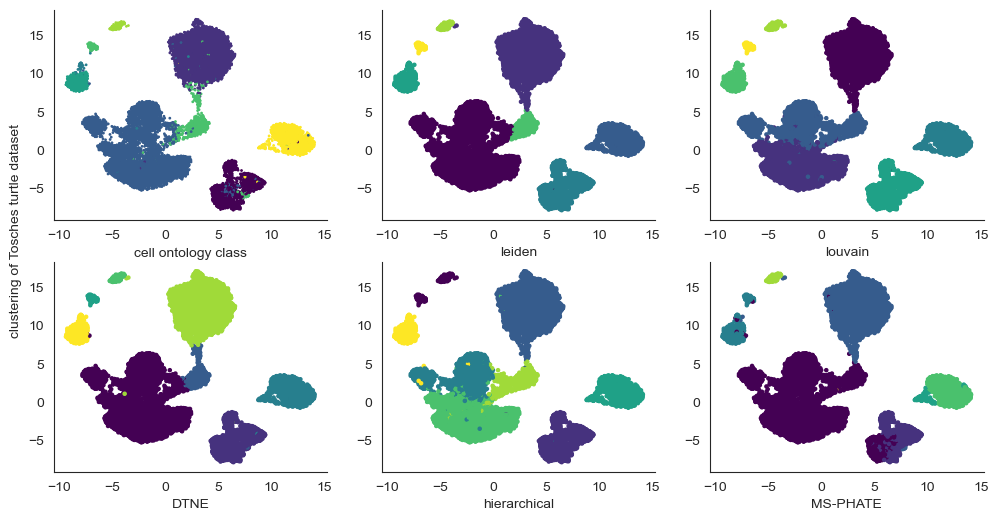

In [9]:
import matplotlib.gridspec as gridspec

fig = plt.figure(figsize=(12, 6))
cmap = 'viridis'
gs3 = gridspec.GridSpec(2, 3)
ax01 = fig.add_subplot(gs3[0])
ax01.scatter(turtle_umap['0'],turtle_umap['1'],s=1,c=turtle_cell_clusters, cmap=cmap)
ax01.set_xlabel('cell ontology class')
sns.despine(top=True,right=True,left=False,bottom=False,)

ax02 = fig.add_subplot(gs3[1])
ax02.scatter(turtle_umap['0'],turtle_umap['1'],s=5,cmap=cmap,c=turtle_cluster.loc['leiden_group'].values.astype('int'))
ax02.set_xlabel('leiden')
sns.despine(top=True,right=True,left=False,bottom=False,)

ax03 = fig.add_subplot(gs3[2])
ax03.scatter(turtle_umap['0'],turtle_umap['1'],s=5,cmap=cmap,c=turtle_cluster.loc['louvain_group'].values.astype('int'))
ax03.set_xlabel('louvain')
sns.despine(top=True,right=True,left=False,bottom=False,)

ax04 = fig.add_subplot(gs3[3])
ax04.scatter(turtle_umap['0'],turtle_umap['1'],s=5,cmap=cmap,c=turtle_cluster.loc['dtne_group'].values.astype('int'))
ax04.set_xlabel('DTNE')
sns.despine(top=True,right=True,left=False,bottom=False,)

ax05 = fig.add_subplot(gs3[4])
ax05.scatter(turtle_umap['0'],turtle_umap['1'],s=5,cmap=cmap,c=turtle_cluster.loc['hierarchical_group'].values.astype('int'))
ax05.set_xlabel('hierarchical')
sns.despine(top=True,right=True,left=False,bottom=False,)

ax06 = fig.add_subplot(gs3[5])
ax06.scatter(turtle_umap['0'],turtle_umap['1'],s=5,cmap=cmap,c=ms_clusters)
ax06.set_xlabel('MS-PHATE')
sns.despine(top=True,right=True,left=False,bottom=False,)

ax01.set_ylabel('clustering of Tosches turtle dataset',y=-0.05)
# ax01.set_label_coords(0, 0, transform=None)
# ax01.text(0,0.5,"clustering of Tosches turtle dataset",rotation=90)

C:\Users\Jon\AppData\Local\Temp\ipykernel_13400\2579329101.py:197: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  gs2.tight_layout(fig, rect=[0, 0.5, 1, 0.75])
C:\Users\Jon\AppData\Local\Temp\ipykernel_13400\2579329101.py:271: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  gs3.tight_layout(fig, rect=[0.05, 0, 1, 0.5])


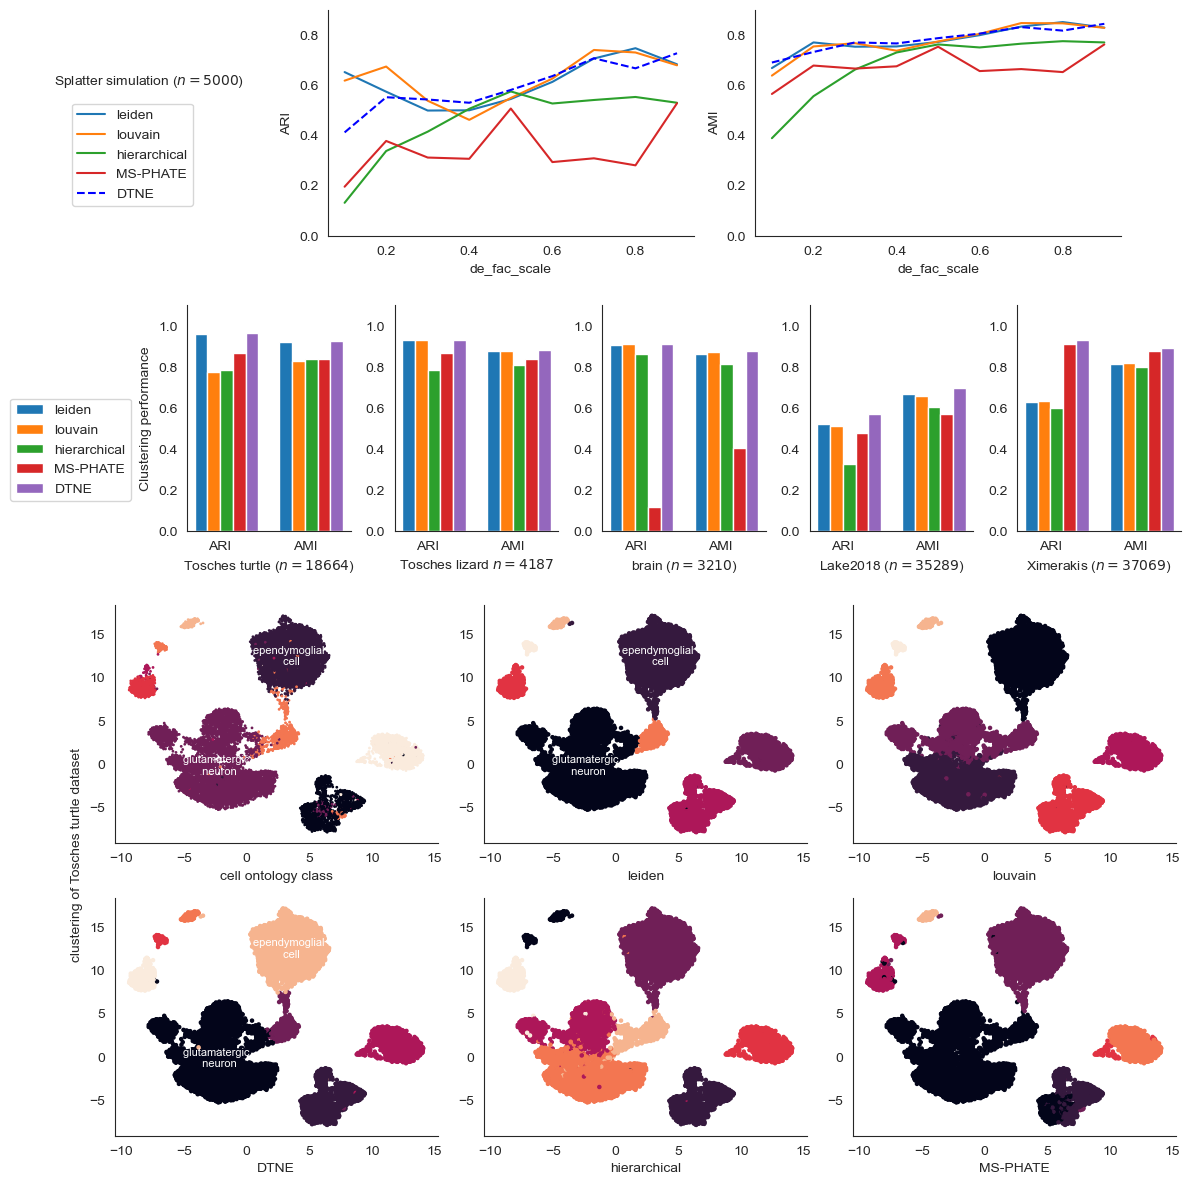

In [17]:
import matplotlib.gridspec as gridspec

fig = plt.figure(figsize=(12, 12))

gs1 = gridspec.GridSpec(1, 2)
ax1 = fig.add_subplot(gs1[0])
ax2 = fig.add_subplot(gs1[1])

sns.set_style(style='white')

x = np.arange(0.1,1,0.1)

leiden_ari =  np.array([0.651, 0.573, 0.498, 0.499, 0.544, 0.612, 0.705, 0.746, 0.682])
leiden_ami =  np.array([0.667, 0.769, 0.752, 0.753, 0.771, 0.798, 0.832, 0.850, 0.828])
louvain_ari = np.array([0.617, 0.673, 0.537, 0.461, 0.548, 0.625, 0.739, 0.729, 0.678])
louvain_ami = np.array([0.637, 0.753, 0.766, 0.736, 0.773, 0.803, 0.846, 0.845, 0.827])

Agglo_ari   = np.array([0.131, 0.337, 0.414, 0.505, 0.574, 0.526, 0.540, 0.552, 0.529])
Agglo_ami   = np.array([0.388, 0.555, 0.661, 0.729, 0.761, 0.749, 0.764, 0.774, 0.769])

mp_ari      = np.array([0.195, 0.377, 0.311, 0.306, 0.506, 0.293, 0.308, 0.280, 0.527])
mp_ami      = np.array([0.564, 0.677, 0.665, 0.674, 0.752, 0.655, 0.663, 0.651, 0.761])

DTNE_ari    = np.array([0.411, 0.551, 0.542, 0.529, 0.580, 0.635, 0.706, 0.666, 0.726]) 
DTNE_ami    = np.array([0.689, 0.731, 0.769, 0.765, 0.786, 0.804, 0.830, 0.816, 0.843])


ax1.plot(x, leiden_ari,  label="leiden")
ax1.plot(x, louvain_ari, label="louvain")
ax1.plot(x, Agglo_ari,   label="hierarchical")
ax1.plot(x, mp_ari,   label="MS-PHATE")
ax1.plot(x, DTNE_ari,  "--b", label="DTNE")
# ax1.legend(loc=4)
ax1.set_ylim(0, 0.9)
ax1.set_xlabel('de_fac_scale')
ax1.set_ylabel('ARI')
sns.despine(top=True,right=True,left=False,bottom=False,)

ax2.plot(x, leiden_ami,  label="leiden")
ax2.plot(x, louvain_ami, label="louvain")
ax2.plot(x, Agglo_ami,   label="hierarchical")
ax2.plot(x, mp_ami,   label="MS-PHATE")
ax2.plot(x, DTNE_ami,  "--b", label="DTNE")
ax2.set_ylim(0, 0.9)
ax2.set_xlabel('de_fac_scale')
ax2.set_ylabel('AMI')

ax1.legend(loc=4, bbox_to_anchor=(-0.35, 0.1))
ax1.text(-0.6,0.6,"Splatter simulation ($n=5000$)")

gs1.tight_layout(fig, rect=[0, 0.75, 0.95, 1])

gs2 = gridspec.GridSpec(1, 5)

ax3 = fig.add_subplot(gs2[0])
ax4 = fig.add_subplot(gs2[1])
ax5 = fig.add_subplot(gs2[2])
ax6 = fig.add_subplot(gs2[3])
ax7 = fig.add_subplot(gs2[4])


correlation = ['ARI','AMI']
pseudotime_corr = {
    'leiden':(0.959, 0.918),
    'louvain':(0.773, 0.829),
    'hierarchical':(0.782, 0.836),
    'MS-PHATE':(0.864, 0.835),
    'DTNE':(0.963, 0.925)
    }
x = np.arange(len(correlation))  # the label locations
width = 0.15  # the width of the bars
multiplier = 0

# fig, ax = plt.subplots(layout='constrained')
for name, corr in pseudotime_corr.items():
    offset = width * multiplier
    rects = ax3.bar(x + offset, corr, width, label=name)
    # ax3.bar_label(rects, padding=1,fontsize=7)
    multiplier += 1

ax3.set_ylabel('Clustering performance')
ax3.set_xlabel('Tosches turtle ($n=18664$)')
ax3.set_xticks(x + 1.5*width, correlation)
ax3.set_ylim(0, 1.1)
sns.despine(top=True,right=True,left=False,bottom=False,)

ax3.legend(loc=4, bbox_to_anchor=(-0.3, 0.1))

#######################

pseudotime_corr = {
    'leiden':(0.928, 0.877),
    'louvain':(0.929, 0.878),
    'hierarchical':(0.783, 0.810),
    'MS-PHATE':(0.864, 0.835),
    'DTNE':(0.930, 0.879)
    }

# x = np.arange(len(correlation))  # the label locations
width = 0.15  # the width of the bars
multiplier = 0

for name, corr in pseudotime_corr.items():
    offset = width * multiplier
    rects = ax4.bar(x + offset, corr, width, label=name)
    # ax4.bar_label(rects,  padding=1,fontsize=7)
    multiplier += 1

ax4.set_xlabel('Tosches lizard $n=4187$')
# ax4.set_ylabel('Clustering performance of Tosches lizard dataset')
ax4.set_xticks(x + 1.5*width, correlation)
# ax4.legend(loc='upper left', ncols=1)
ax4.set_ylim(0, 1.1)

sns.despine(top=True,right=True,left=False,bottom=False,)

#######################
pseudotime_corr = {
    'leiden':(0.905, 0.861),
    'louvain':(0.909, 0.871),
    'hierarchical':(0.861, 0.811),
    'MS-PHATE':(0.117, 0.401),
    'DTNE':(0.912, 0.875)
    }

# x = np.arange(len(correlation))  # the label locations
width = 0.15  # the width of the bars
multiplier = 0

for name, corr in pseudotime_corr.items():
    offset = width * multiplier
    rects = ax5.bar(x + offset, corr, width, label=name)
    # ax5.bar_label(rects,  padding=1,fontsize=7)
    multiplier += 1

ax5.set_xlabel('brain ($n=3210$)')
# ax4.set_ylabel('Clustering performance')
ax5.set_xticks(x + 1.5*width, correlation)
ax5.set_ylim(0, 1.1)
sns.despine(top=True,right=True,left=False,bottom=False,)

##########################

pseudotime_corr = {
    'leiden':(0.519, 0.667),
    'louvain':(0.511, 0.655),
    'hierarchical':(0.323, 0.604),
    'MS-PHATE':(0.474, 0.571),
    'DTNE':(0.569, 0.695)
    }

width = 0.15  # the width of the bars
multiplier = 0


for name, corr in pseudotime_corr.items():
    offset = width * multiplier
    rects = ax6.bar(x + offset, corr, width, label=name)
    # ax6.bar_label(rects,  padding=1,fontsize=7)
    multiplier += 1

ax6.set_xlabel('Lake2018 ($n=35289$)')
# ax5.set_ylabel('Clustering performance')
ax6.set_xticks(x + 1.5*width, correlation)
ax6.set_ylim(0, 1.1)

sns.despine(top=True,right=True,left=False,bottom=False,)

##########################
pseudotime_corr = {
    'leiden':(0.625, 0.813),
    'louvain':(0.631, 0.816),
    'hierarchical':(0.597, 0.797),
    'MS-PHATE':(0.910, 0.877),
    'DTNE':(0.929, 0.892)
    }

# x = np.arange(len(correlation))  # the label locations
width = 0.15  # the width of the bars
multiplier = 0

for name, corr in pseudotime_corr.items():
    offset = width * multiplier
    rects = ax7.bar(x + offset, corr, width, label=name)
    # ax.bar_label(rects,padding=1,fontsize=7)
    multiplier += 1

ax7.set_xlabel('Ximerakis ($n=37069$)')
# ax7.set_ylabel('Clustering performance of Ximerakis dataset')
ax7.set_xticks(x + 1.5*width, correlation)
# ax7.legend(loc='upper left', ncols=1)
ax7.set_ylim(0, 1.1)

sns.despine(top=True,right=True,left=False,bottom=False,)
##########################

gs2.tight_layout(fig, rect=[0, 0.5, 1, 0.75])

gs3 = gridspec.GridSpec(2, 3)

ax01 = fig.add_subplot(gs3[0])
im=ax01.scatter(turtle_umap['0'],turtle_umap['1'],s=1,c=turtle_cell_clusters)
turtle_umap2 = pd.DataFrame(adata.obsm['X_umap'],cell_ontology_class)
plt.annotate('glutamatergic \n neuron', 
                 turtle_umap2.loc[turtle_umap2.index=='glutamatergic neuron',[0,1]].mean(),
                 horizontalalignment='center',
                 verticalalignment='center',
                 size=8, color='white') # weight='bold',
plt.annotate('ependymoglial \n cell', 
                 turtle_umap2.loc[turtle_umap2.index=='ependymoglial cell',[0,1]].mean(),
                 horizontalalignment='center',
                 verticalalignment='center',
                 size=8,  color='white')

im.set_rasterized(True)
ax01.set_xlabel('cell ontology class')
sns.despine(top=True,right=True,left=False,bottom=False,)

ax02 = fig.add_subplot(gs3[1])
im=ax02.scatter(turtle_umap['0'],turtle_umap['1'],s=5,c=turtle_cluster.loc['leiden_group'].values.astype('int'))
im.set_rasterized(True)
plt.annotate('glutamatergic \n neuron', 
                 turtle_umap2.loc[turtle_umap2.index=='glutamatergic neuron',[0,1]].mean(),
                 horizontalalignment='center',
                 verticalalignment='center',
                 size=8, color='white') # weight='bold',
plt.annotate('ependymoglial \n cell', 
                 turtle_umap2.loc[turtle_umap2.index=='ependymoglial cell',[0,1]].mean(),
                 horizontalalignment='center',
                 verticalalignment='center',
                 size=8,  color='white')
ax02.set_xlabel('leiden')
sns.despine(top=True,right=True,left=False,bottom=False,)

ax03 = fig.add_subplot(gs3[2])
im=ax03.scatter(turtle_umap['0'],turtle_umap['1'],s=5,c=turtle_cluster.loc['louvain_group'].values.astype('int'))
im.set_rasterized(True)
ax03.set_xlabel('louvain')
sns.despine(top=True,right=True,left=False,bottom=False,)

ax04 = fig.add_subplot(gs3[3])
im=ax04.scatter(turtle_umap['0'],turtle_umap['1'],s=5,c=turtle_cluster.loc['dtne_group'].values.astype('int'))
im.set_rasterized(True)
plt.annotate('glutamatergic \n neuron', 
                 turtle_umap2.loc[turtle_umap2.index=='glutamatergic neuron',[0,1]].mean(),
                 horizontalalignment='center',
                 verticalalignment='center',
                 size=8, color='white') # weight='bold',
plt.annotate('ependymoglial \n cell', 
                 turtle_umap2.loc[turtle_umap2.index=='ependymoglial cell',[0,1]].mean(),
                 horizontalalignment='center',
                 verticalalignment='center',
                 size=8,  color='white')
ax04.set_xlabel('DTNE')
sns.despine(top=True,right=True,left=False,bottom=False,)

ax05 = fig.add_subplot(gs3[4])
im=ax05.scatter(turtle_umap['0'],turtle_umap['1'],s=5,c=turtle_cluster.loc['hierarchical_group'].values.astype('int'))
im.set_rasterized(True)
ax05.set_xlabel('hierarchical')
sns.despine(top=True,right=True,left=False,bottom=False,)

ax06 = fig.add_subplot(gs3[5])
im=ax06.scatter(turtle_umap['0'],turtle_umap['1'],s=5,c=ms_clusters)
im.set_rasterized(True)
ax06.set_xlabel('MS-PHATE')
sns.despine(top=True,right=True,left=False,bottom=False,)

ax01.set_ylabel('clustering of Tosches turtle dataset',y=-0.05)

gs3.tight_layout(fig, rect=[0.05, 0, 1, 0.5])

plt.savefig('./sc_cluster5.png', format='png', dpi=1000)
plt.savefig('./sc_cluster5.pdf', format='pdf', dpi=1000)